In [57]:
!pip install pandas
!pip install matplotlib

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [59]:
def graph_line(**kwargs):
    # Gerar o gráfico
    plt.figure(figsize=(10, 6))

    for plot in kwargs['plots']:
        marker = plot.get('marker', 'o')
        color = plot.get('color', 'b')
        
        plt.plot(plot['scalex'], plot['scaley'], label=plot['label'], marker=marker, color=color)

    # Adicionar títulos e rótulos
    plt.title(kwargs['title'])
    plt.xlabel(kwargs['xlabel'])
    plt.ylabel(kwargs['ylabel'])
    plt.grid(True)
    plt.legend()

    # Exibir o gráfico
    plt.show()


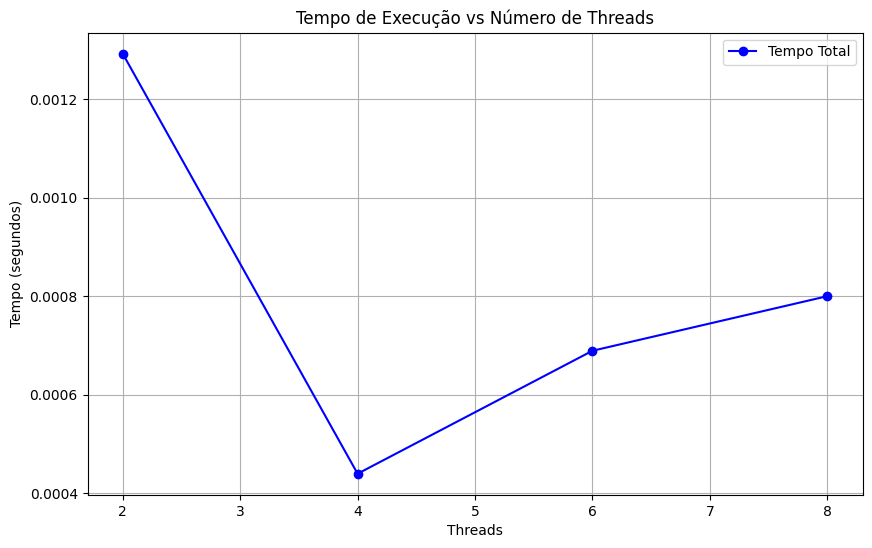

In [60]:
# Carregar os dados
df_threads = pd.read_csv('tempo_threads.csv')

graph_line(**{
    'plots': [{
        'scalex': df_threads['Threads'],
        'scaley': df_threads['Tempo (segundos)'],
        'label': 'Tempo Total',
    }],
    'title': 'Tempo de Execução vs Número de Threads',
    'xlabel': 'Threads',
    'ylabel': 'Tempo (segundos)'
})


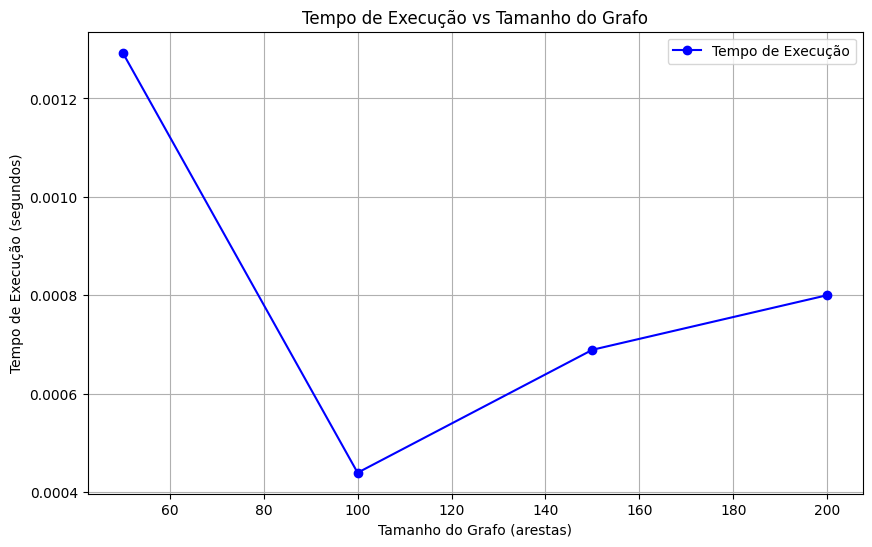

In [61]:
# Carregar os dados
df_grafo = pd.read_csv('tempo_grafo_tamanho.csv')

# Remover espaços extras nos nomes das colunas
df_grafo.columns = df_grafo.columns.str.strip()

graph_line(**{
    'plots': [{
        'scalex': df_grafo['Tamanho do Grafo (arestas)'],
        'scaley': df_grafo['Tempo Total de Execução (segundos)'],
        'label': 'Tempo de Execução',
    }],
    'title': 'Tempo de Execução vs Tamanho do Grafo',
    'xlabel': 'Tamanho do Grafo (arestas)',
    'ylabel': 'Tempo de Execução (segundos)'
})



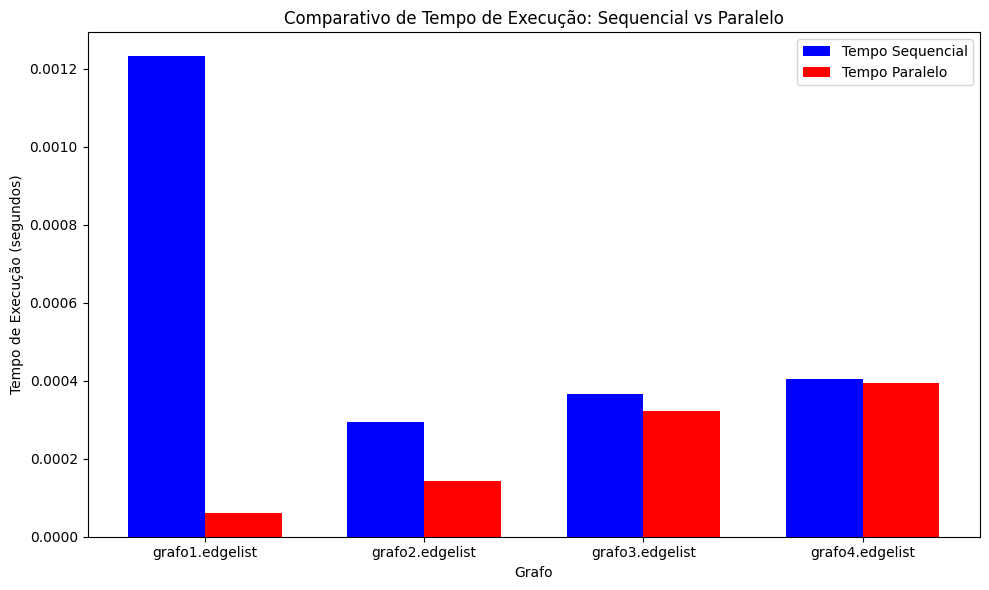

In [62]:
# Carregar os dados
df_comparacao = pd.read_csv('comparacao_sequencial_paralelo.csv')

# Remover espaços extras nos nomes das colunas
df_comparacao.columns = df_comparacao.columns.str.strip()

# Verificar as primeiras linhas para entender os dados
#print(df_comparacao.head())

# Plotar gráfico de barras comparando tempo sequencial e paralelo
fig, ax = plt.subplots(figsize=(10, 6))

# Definir a largura das barras
bar_width = 0.35

# Definir as posições para as barras
index = range(len(df_comparacao))

# Plotar barras para o tempo sequencial
ax.bar(index, df_comparacao['Tempo Sequencial (segundos)'], bar_width, label='Tempo Sequencial', color='b')

# Plotar barras para o tempo paralelo
ax.bar([i + bar_width for i in index], df_comparacao['Tempo Paralelo (mais lento) (segundos)'], bar_width, label='Tempo Paralelo', color='r')

# Adicionar título e rótulos
ax.set_title('Comparativo de Tempo de Execução: Sequencial vs Paralelo')
ax.set_xlabel('Grafo')
ax.set_ylabel('Tempo de Execução (segundos)')

# Definir as labels do eixo X
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(df_comparacao['Grafo'])

# Adicionar legenda
ax.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

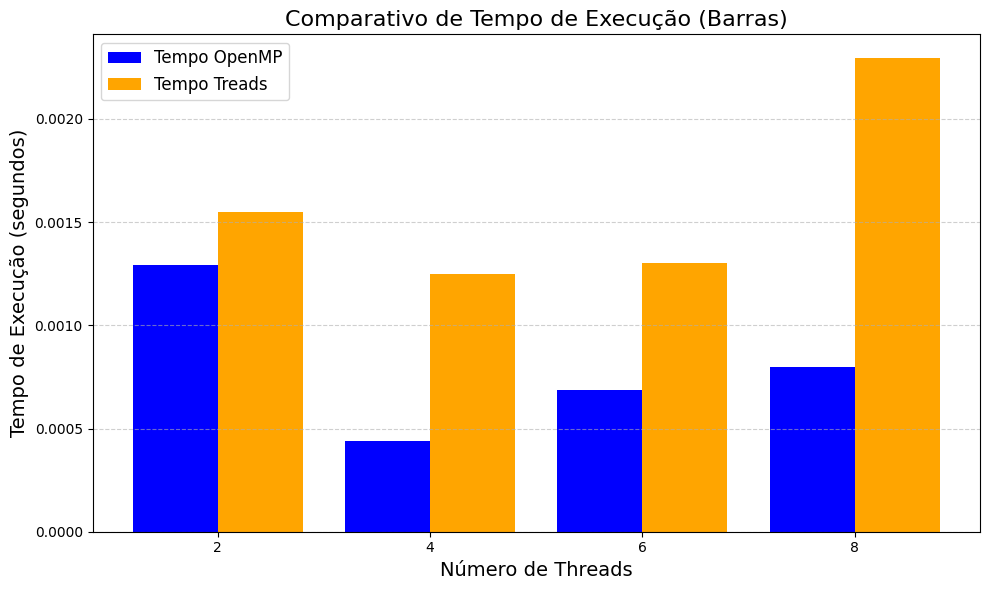

In [63]:
# Nome do arquivo CSV
csv_filename = "tempo_OpenMPI_SemOpenMPI.csv"

# Carregar os dados do CSV
df = pd.read_csv(csv_filename)

# Largura das barras
bar_width = 0.4

# Posições das barras no eixo X
x = np.arange(len(df['Threads']))

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(
    x - bar_width / 2, 
    df['Tempo_OpenMP (segundos)'], 
    bar_width, 
    label='Tempo OpenMP', 
    color='blue'
)
plt.bar(
    x + bar_width / 2, 
    df['Tempo_Treads (segundos)'], 
    bar_width, 
    label='Tempo Treads', 
    color='orange'
)

# Configurações do gráfico
plt.title("Comparativo de Tempo de Execução (Barras)", fontsize=16)
plt.xlabel("Número de Threads", fontsize=14)
plt.ylabel("Tempo de Execução (segundos)", fontsize=14)
plt.xticks(x, df['Threads'])  # Colocar os valores dos threads no eixo X
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()


# Exibir o gráfico
plt.show()


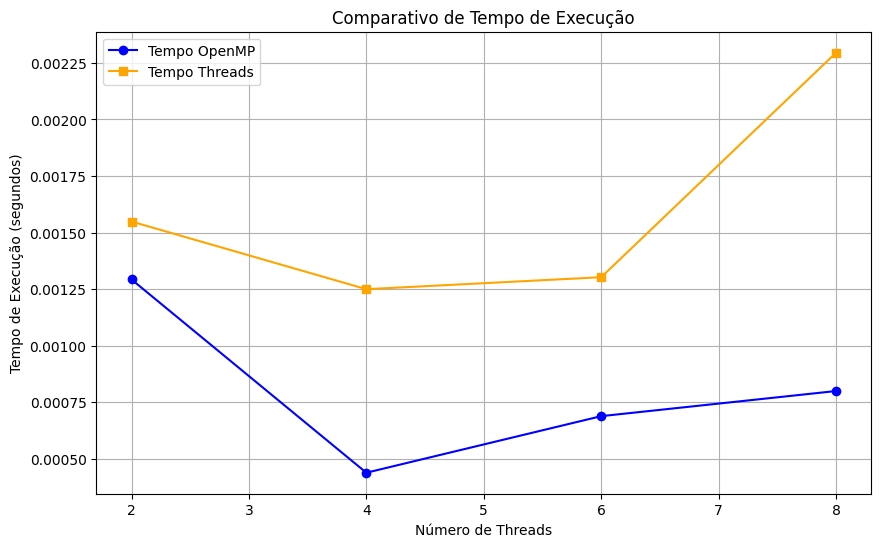

In [64]:
# Nome do arquivo CSV
csv_filename = "tempo_OpenMPI_SemOpenMPI.csv"

# Carregar os dados do CSV
df = pd.read_csv(csv_filename)

graph_line(**{
    'plots': [{
        'scalex': df['Threads'],
        'scaley': df['Tempo_OpenMP (segundos)'],
        'label': 'Tempo OpenMP',
    },{
        'scalex': df['Threads'],
        'scaley': df['Tempo_Treads (segundos)'],
        'label': 'Tempo Threads',
        'marker': 's', 
        'color': 'orange', 
    }],
    'title': 'Comparativo de Tempo de Execução',
    'xlabel': 'Número de Threads',
    'ylabel': 'Tempo de Execução (segundos)'
})

